# Introduction🥰
### Project Title:
Predicting Customer Churn Using Machine Learning: A Case Study on a Telecom Dataset

### Objective:
The goal of this project is to build a machine learning pipeline that predicts whether a customer will churn (i.e., leave the company) or stay, based on their demographic information, account details, and service usage patterns. This is a common and critical problem in the telecom industry, where customer retention has a direct impact on revenue.

### Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration

### Business Value:
By identifying customers at risk of churn, telecom companies can proactively implement strategies such as targeted marketing campaigns, loyalty programs, and customized offers to retain these customers.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')

#               EDA:

Before any analysis, we need to load the dataset and take an initial look to understand its structure and contents.

In [14]:
df = pd.read_csv(r'D:\MSC\Final Project MLSA- Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### Check for Missing or Unusual Values
Missing or incorrect values can mislead our model. Identifying and handling them is a key step in data cleaning.

In [19]:
df.isnull().sum().sum()

np.int64(0)

##### Understand the Target Variable by Visualize Churn Distribution:
It’s important to know whether the target variable Churn is imbalanced or not — this can impact model performance and will influence our evaluation strategy.

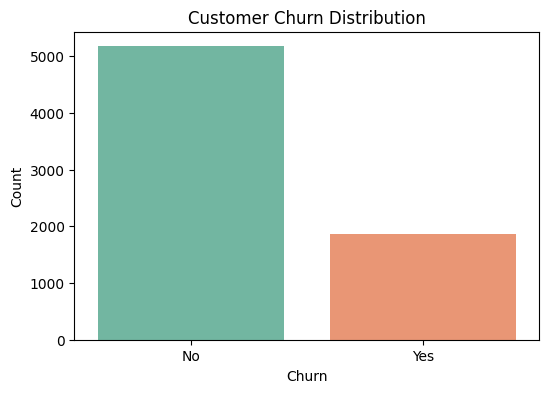

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

##### Distribution of Numerical Features:

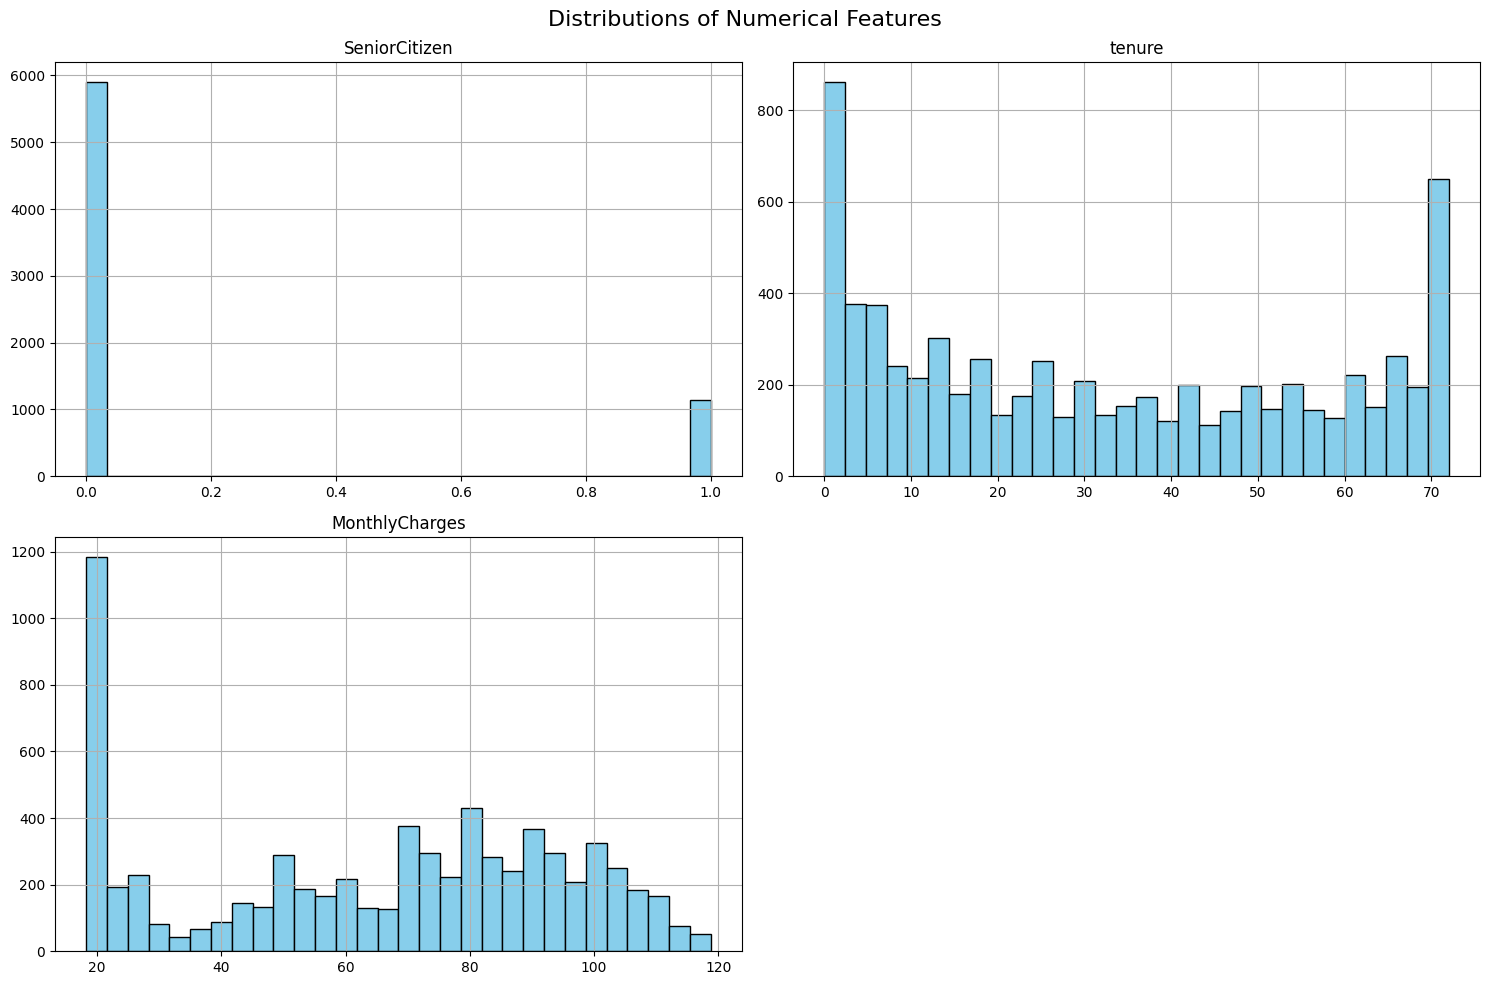

In [22]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

##### Relationship Between Numerical Features and Churn:

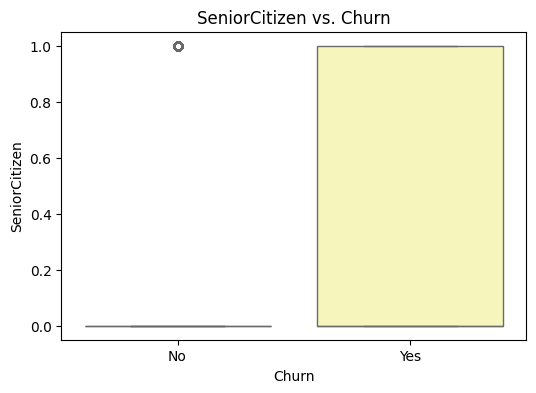

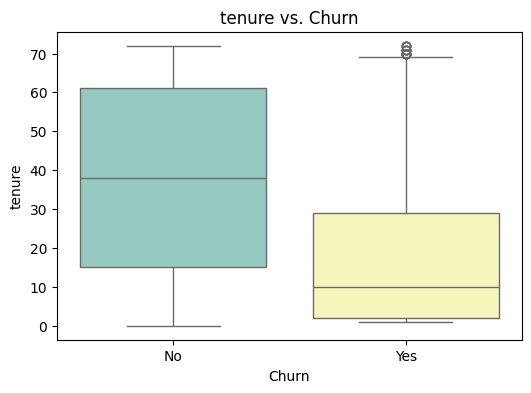

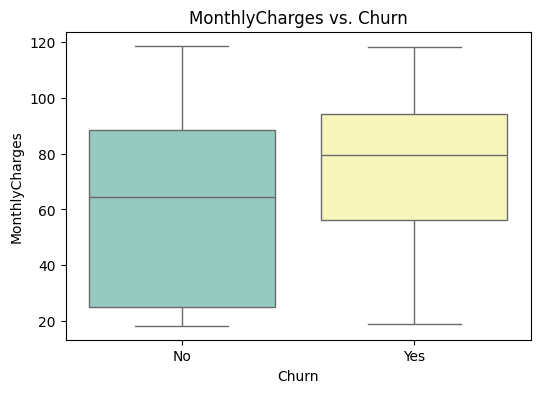

In [24]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette='Set3')
    plt.title(f"{col} vs. Churn")
plt.show()

##### Distribution of Categorical Features:

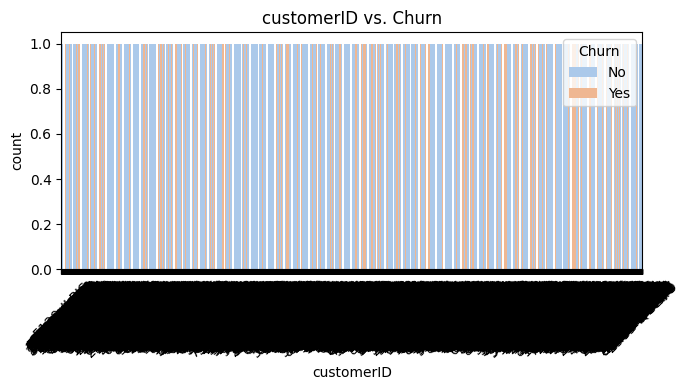

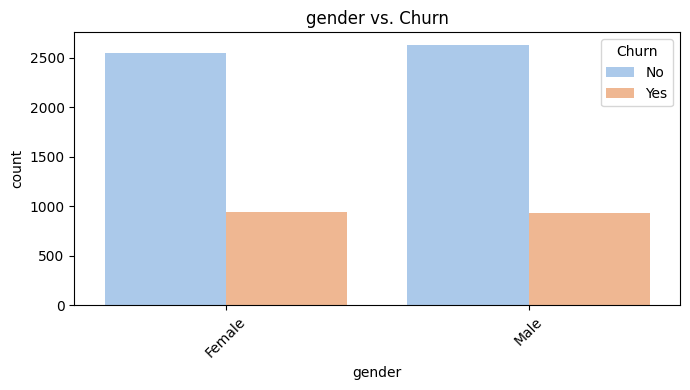

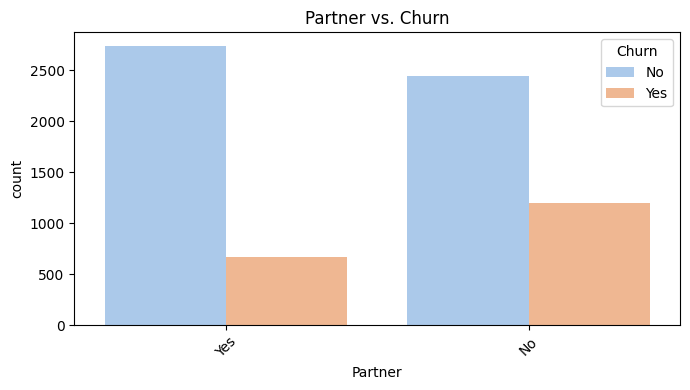

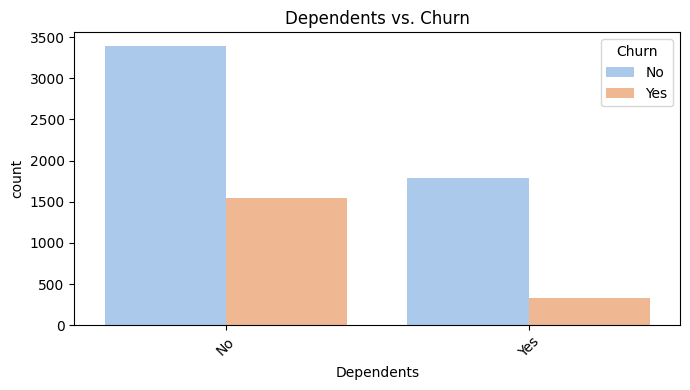

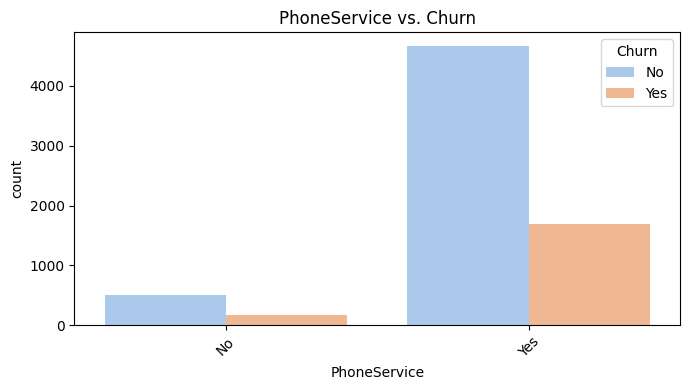

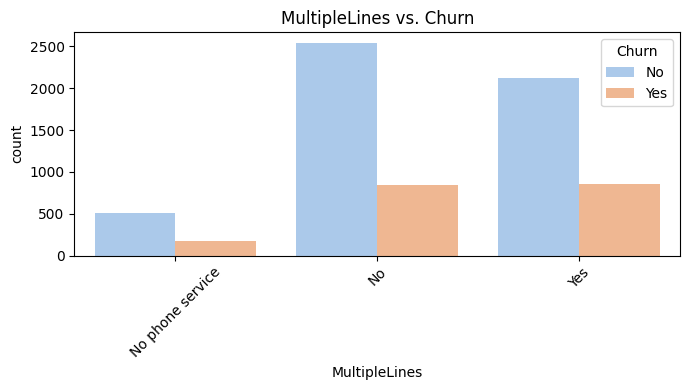

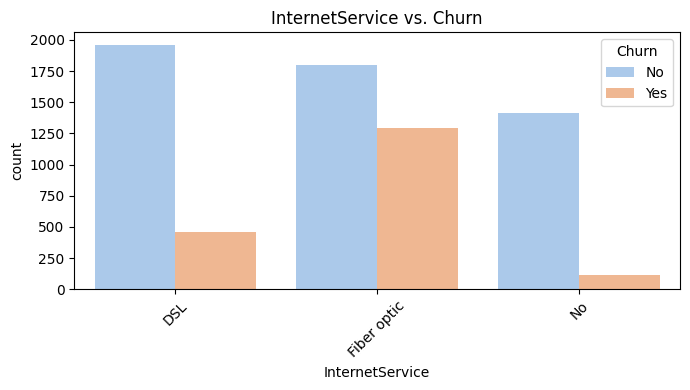

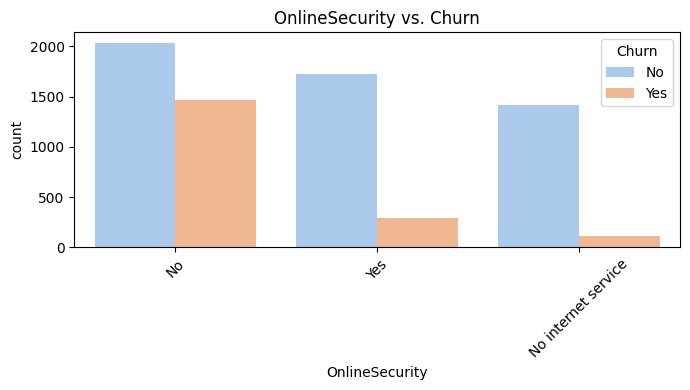

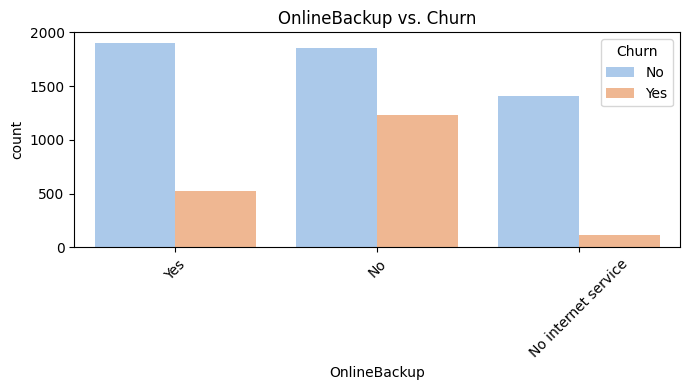

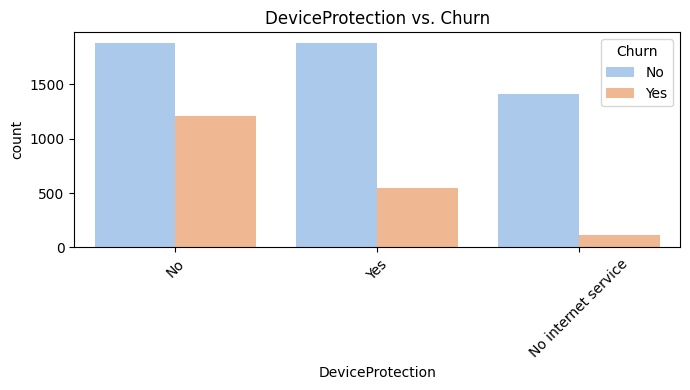

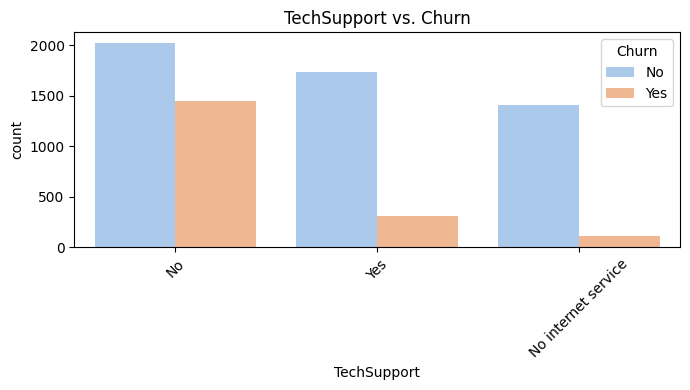

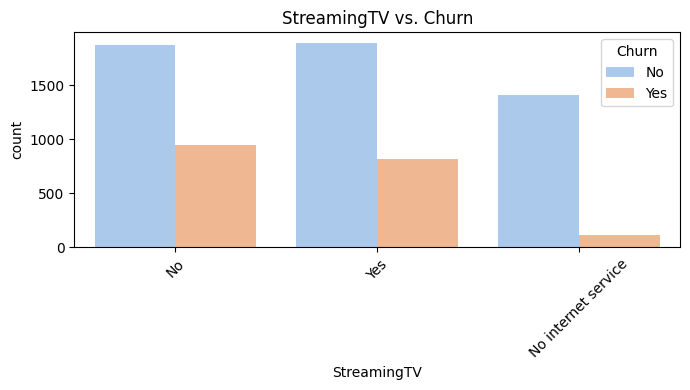

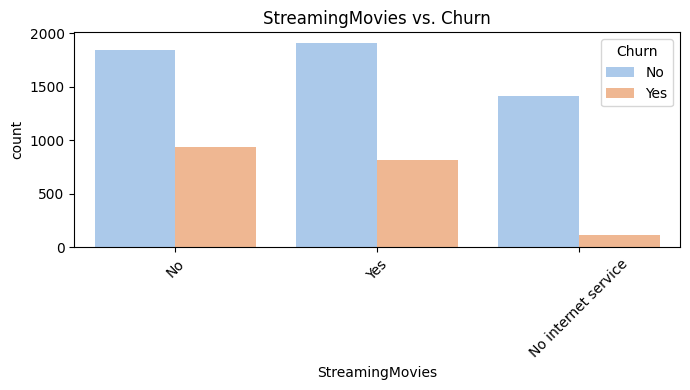

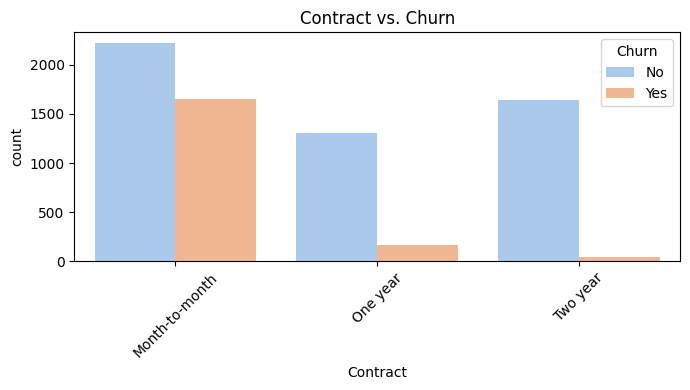

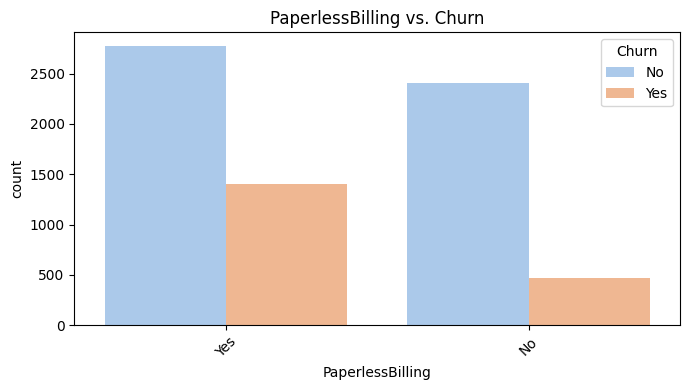

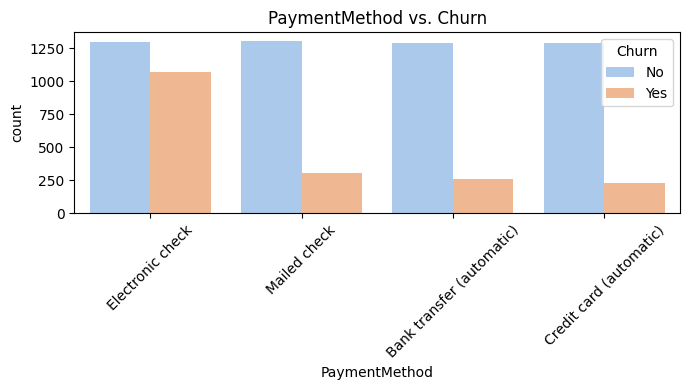

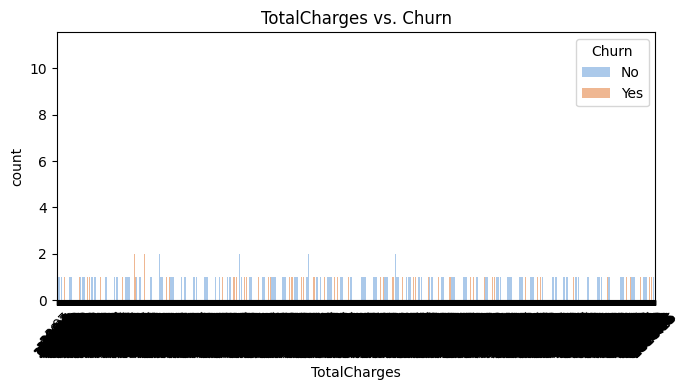

In [27]:
# Categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')  # exclude target for now

# Count plots
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    plt.title(f"{col} vs. Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Correlation Matrix for Numerical Features:

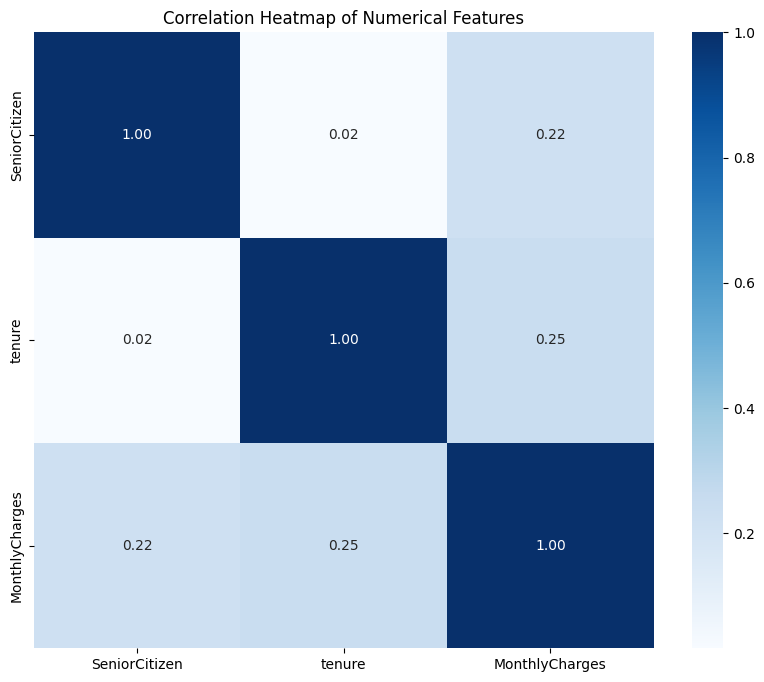

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# EDA is Done✅

__________________________________

# Preprocessing
In this step, we will clean and transform the dataset to prepare it for machine learning models.
This includes handling missing and incorrect values, encoding categorical variables, and scaling numerical features.

'TotalCharges' is supposed to be numeric, but it is stored as object due to some empty strings.
We'll convert it to float and handle any errors.


In [31]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()

np.int64(11)

 Drop Rows with Missing TotalCharges:

In [33]:
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True,inplace=True)

Encode Categorical Features:

In [34]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    df[col] = LabelEncoder().fit_transform(df[col])
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

 We'll drop 'customerID' since it's just an identifier and not useful for prediction

In [36]:
df = df.drop('customerID',axis=1)

Scale Numerical Features:

In [37]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

### Preprocessing Visualizations

Distribution of Scaled Numerical Features

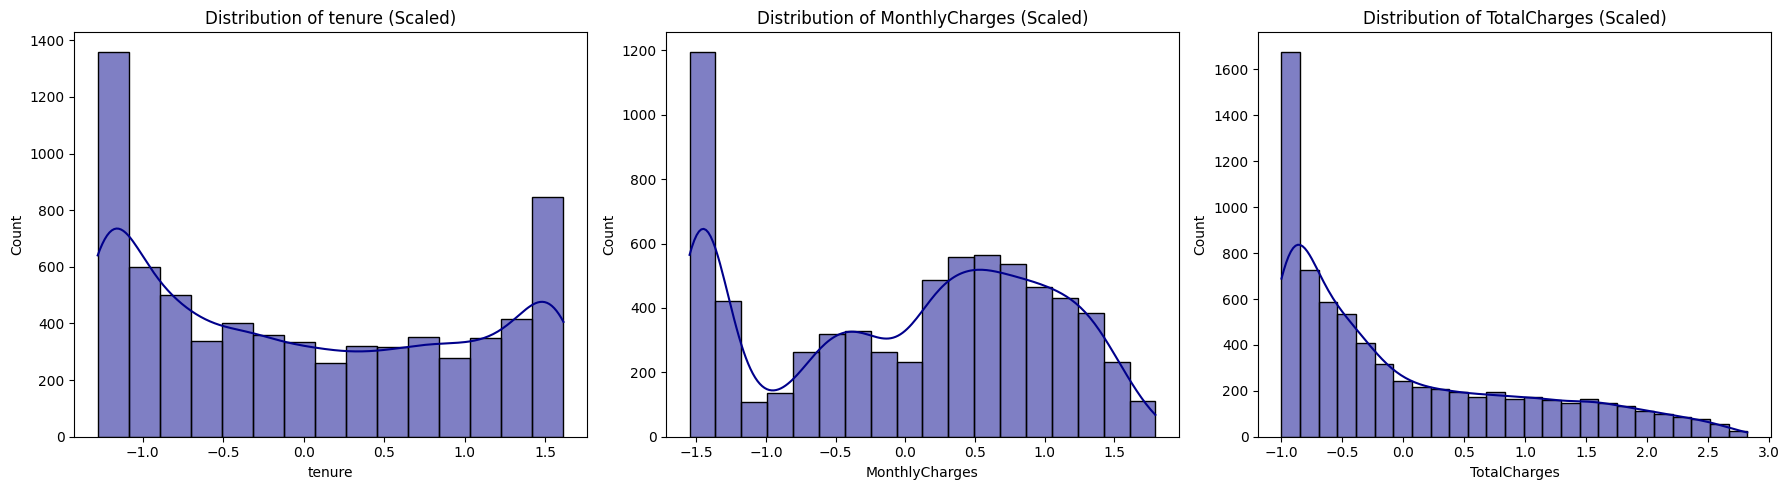

In [39]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axs[i], kde=True, color='darkblue')
    axs[i].set_title(f'Distribution of {col} (Scaled)')
plt.tight_layout()
plt.show()

Heatmap After Encoding

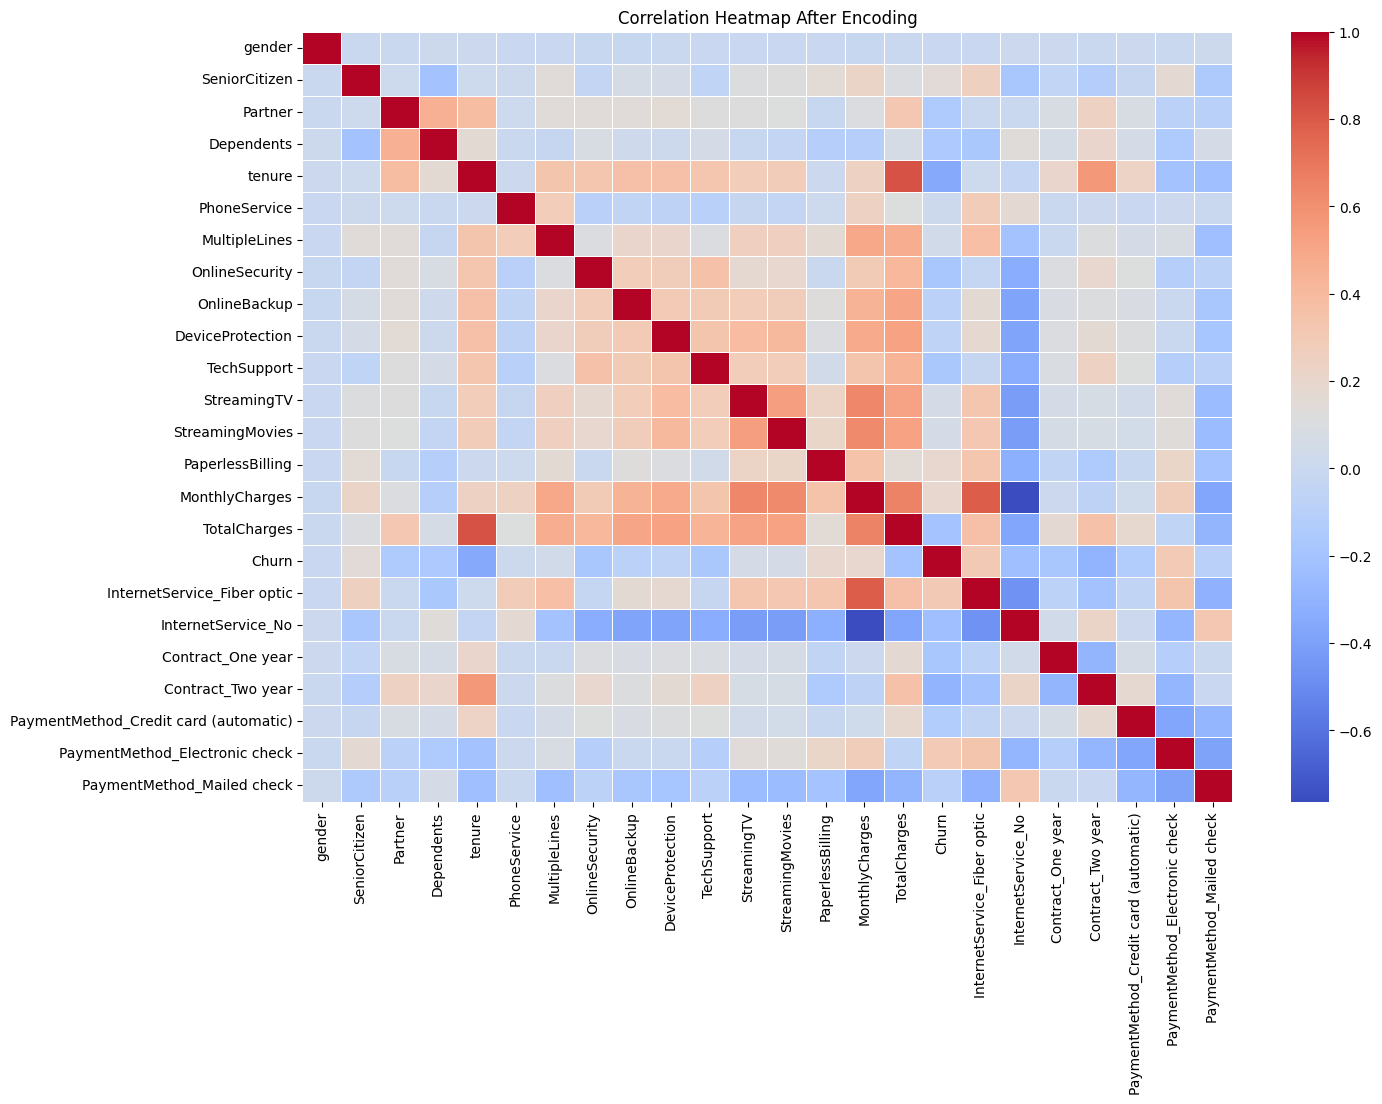

In [40]:
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Encoding')
plt.show()

Let's see how Monthly Charges vary for Churned vs Non-Churned customers.

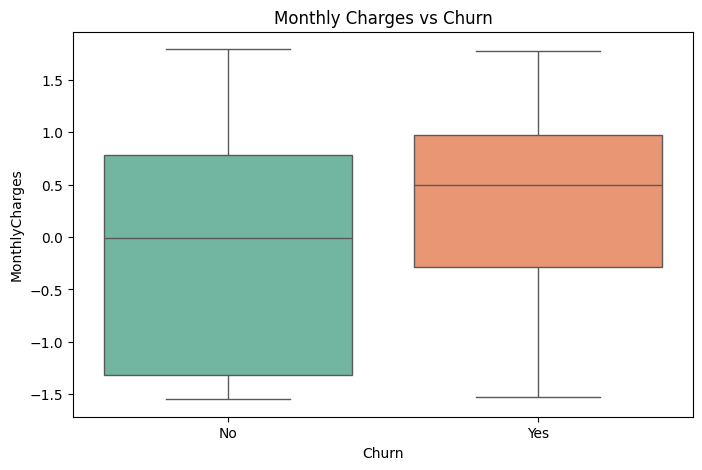

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Preprocessing is Done✅

____________________________

# Splitting the Data and Training the Models🎯
We want to split our dataset into training and testing sets so we can train classification models to predict churn. We'll then fit multiple models and compare their performance later.

We'll split the dataset into features (X) and the target variable (y), then divide them into training and test sets.


In [42]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training Set: {X_train.shape}, Test Set: {X_test.shape}')

Training Set: (5625, 23), Test Set: (1407, 23)


### Training Logistic Regression:

In [47]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Training Random Forest

In [48]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Training XGBoost

In [49]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Training Models is Done✅

________________________________________________________

# Evaluate Model Performance, Visualization
I want to compare how well each model predicts customer churn using metrics like Accuracy, Precision, Recall, F1-score, Confusion Matrix, and ROC-AUC curve.


I 'll Create a function to evaluate models and print all metrics.

In [50]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f'----- {name} -----')
    print(f'Accuracy:  {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall:    {rec:.4f}')
    print(f'F1 Score:  {f1:.4f}')
    print(f'ROC AUC:   {roc_auc:.4f}')
    
    return y_pred, y_proba

### Evaluate Logistic Regression🧮:

In [51]:
lr_pred, lr_proba = evaluate_model("Logistic Regression", lr_model,X_test,y_test)

----- Logistic Regression -----
Accuracy:  0.8031
Precision: 0.6483
Recall:    0.5668
F1 Score:  0.6049
ROC AUC:   0.8362


### Evaluate Random Forest🧮:

In [52]:
rf_pred, rf_proba = evaluate_model("Random Forest", rf_model, X_test, y_test)

----- Random Forest -----
Accuracy:  0.7910
Precision: 0.6333
Recall:    0.5080
F1 Score:  0.5638
ROC AUC:   0.8211


### Evaluate XGBoost🧮:

In [54]:
xgb_pred, xgb_proba = evaluate_model("XGBoost", xgb_model,X_test,y_test)

----- XGBoost -----
Accuracy:  0.7783
Precision: 0.5891
Recall:    0.5481
F1 Score:  0.5679
ROC AUC:   0.8196


### Now I 'll Visualize Confusion Matrices for our lovelly Models.

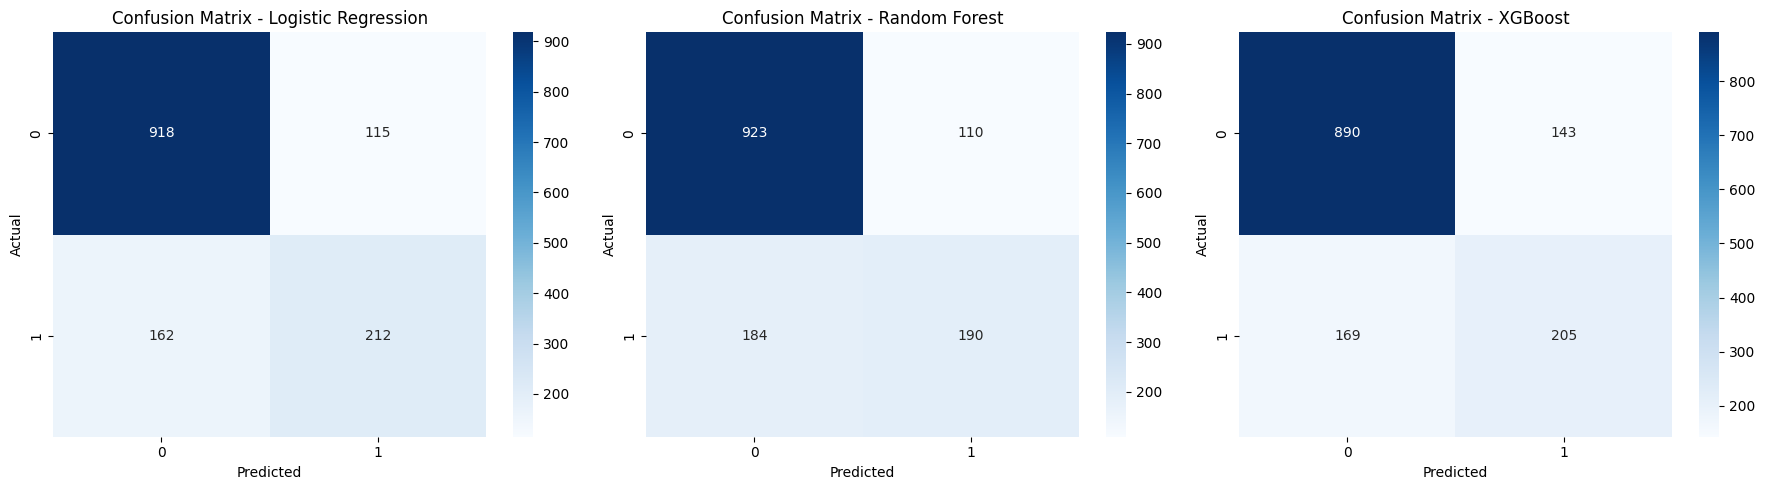

In [55]:
models = {
    'Logistic Regression': lr_pred,
    'Random Forest': rf_pred,
    'XGBoost': xgb_pred
}

plt.figure(figsize=(18, 5))
for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Plot ROC Curves:

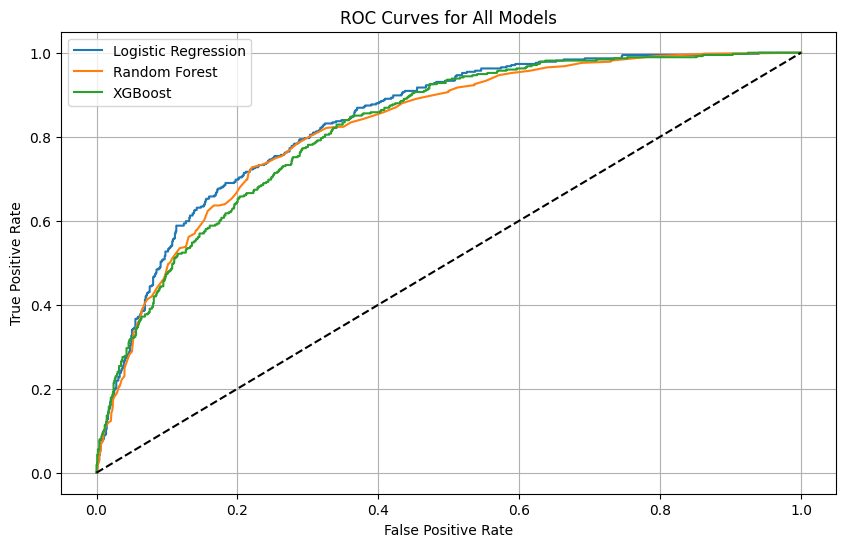

In [56]:
plt.figure(figsize=(10, 6))
fpr1, tpr1, _ = roc_curve(y_test, lr_proba)
fpr2, tpr2, _ = roc_curve(y_test, rf_proba)
fpr3, tpr3, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot(fpr3, tpr3, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Model Performance, Visualization is Done✅

________________________________________________________

# Analyze Feature Importance
We want to understand which features have the most impact on predicting customer churn. This can help the business focus on key areas to reduce churn.

Get feature importance from Random Forest:

In [57]:
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importance = rf_importance.sort_values(ascending=False)

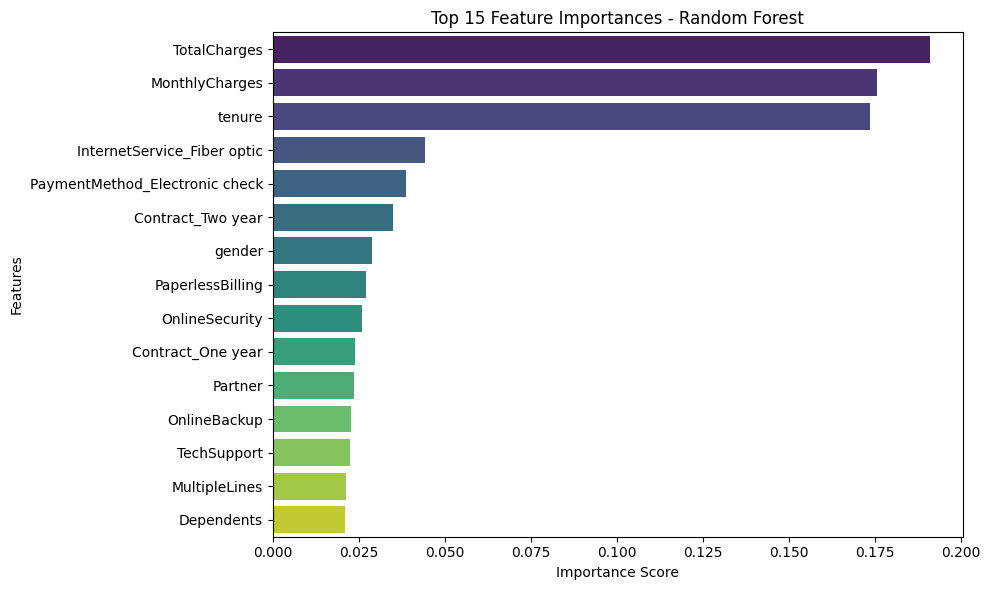

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance[:15], y=rf_importance.index[:15], palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Get feature importance from XGBoost:

In [59]:
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importance = xgb_importance.sort_values(ascending=False)

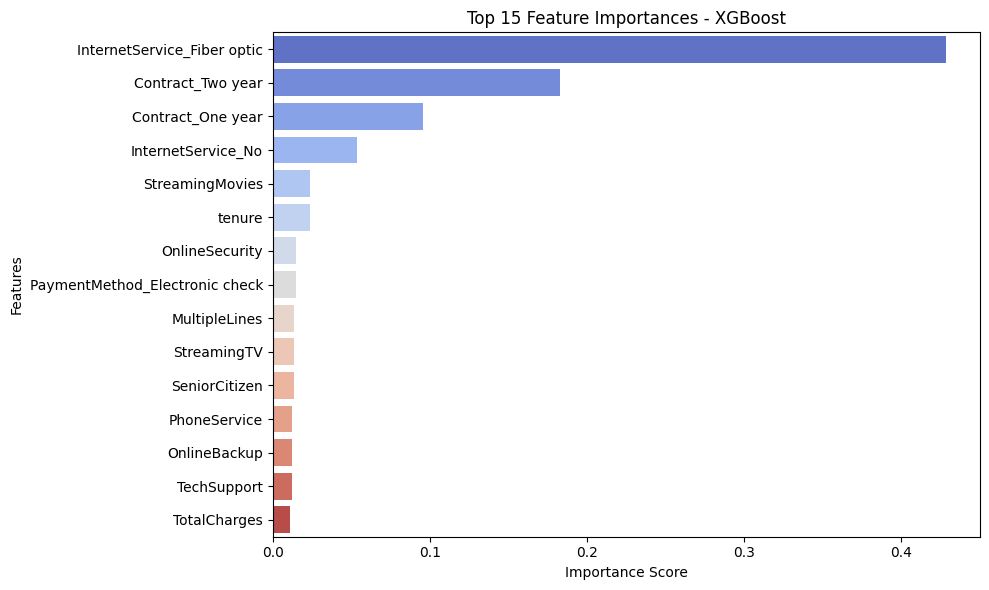

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance[:15], y=xgb_importance.index[:15], palette='coolwarm')
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### From the feature importance analysis using models like Random Forest and XGBoost, we observed the following:

1. Financial features strongly impact churn behavior:

TotalCharges and MonthlyCharges were the top predictors in the Random Forest model.

This implies that customers with higher spending are more likely to be sensitive to pricing or service value.



2. Internet service type is a key driver of churn:

InternetService_Fiber optic ranked highly in XGBoost’s feature importance.

This suggests that customers using fiber optic service may be experiencing issues leading to dissatisfaction.



3. Contract duration is an effective retention factor:

Features like One year and Two year contracts were highly influential in the XGBoost model.

Longer contracts may promote customer stability and reduce churn, especially when paired with incentives.

### Business Recommendations:

1. Offer Flexible Plans for High-Spending Customers

Insight: Customers with high Total Charges or Monthly Charges are more likely to churn.

Action:

Design loyalty programs for high-value customers.

Provide dynamic discounts based on Customer Lifetime Value (CLV).

Monitor billing complaints and offer more flexible plans or spending limits.




2. Improve Fiber Optic Internet Service Quality

Insight: Customers using Fiber Optic internet are more likely to churn.

Action:

Invest in infrastructure upgrades and faster issue resolution.

Regularly collect customer feedback through surveys and act on it.




3. Use Contract Length as a Retention Strategy

Insight: Customers with 1- or 2-year contracts are less likely to churn.

Action:

Promote long-term contracts with benefits like discounts or free upgrades.

Send renewal reminders with personalized offers before contract expiration.




4. Segment Customers by Risk and Value

Action:

Use predictive models to identify high-risk, high-value customers.

Launch personalized retention campaigns using CRM systems.




5. Deploy a Predictive Retention System

Action:

Build an internal dashboard for support agents to flag risky customers and recommend personalized interventions.